https://apps.skillfactory.ru/learning/course/course-v1:SkillFactory+DST-3.0+28FEB2021/block-v1:SkillFactory+DST-3.0+28FEB2021+type@sequential+block@2bfba3b2be4b41bc8685b5fc9be80592/block-v1:SkillFactory+DST-3.0+28FEB2021+type@vertical+block@341140f4f2f84348a804439d95029f17

Формально структура дерева решений — это связный ациклический граф. Что это значит?

Граф — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер.

Связный граф — это граф, в котором между любой парой существует направленная связь.

Ациклический граф — это граф, в котором отсутствуют циклы, то есть в графе не существует такого пути, по которому можно вернуться в начальную вершину.

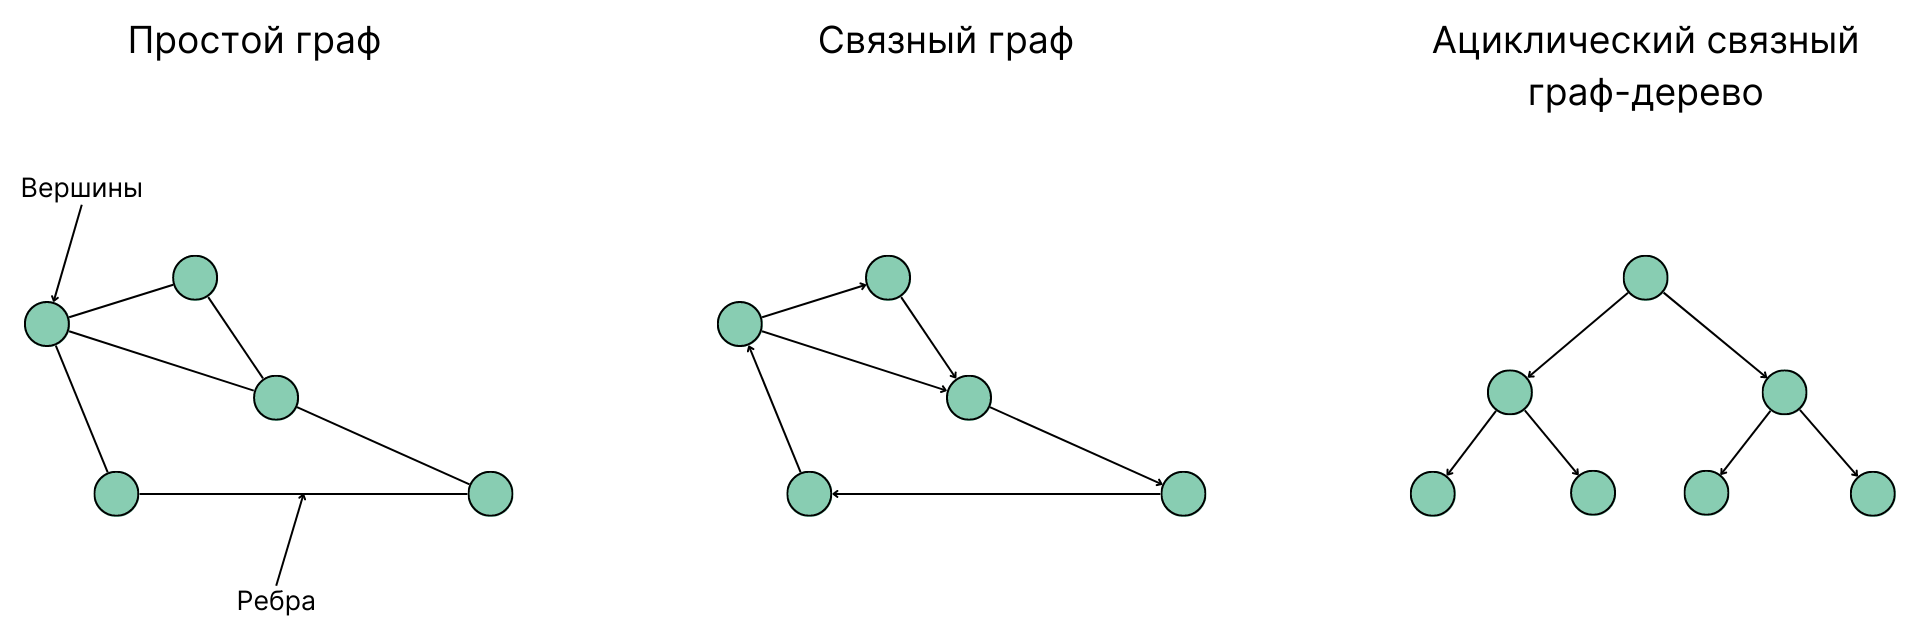

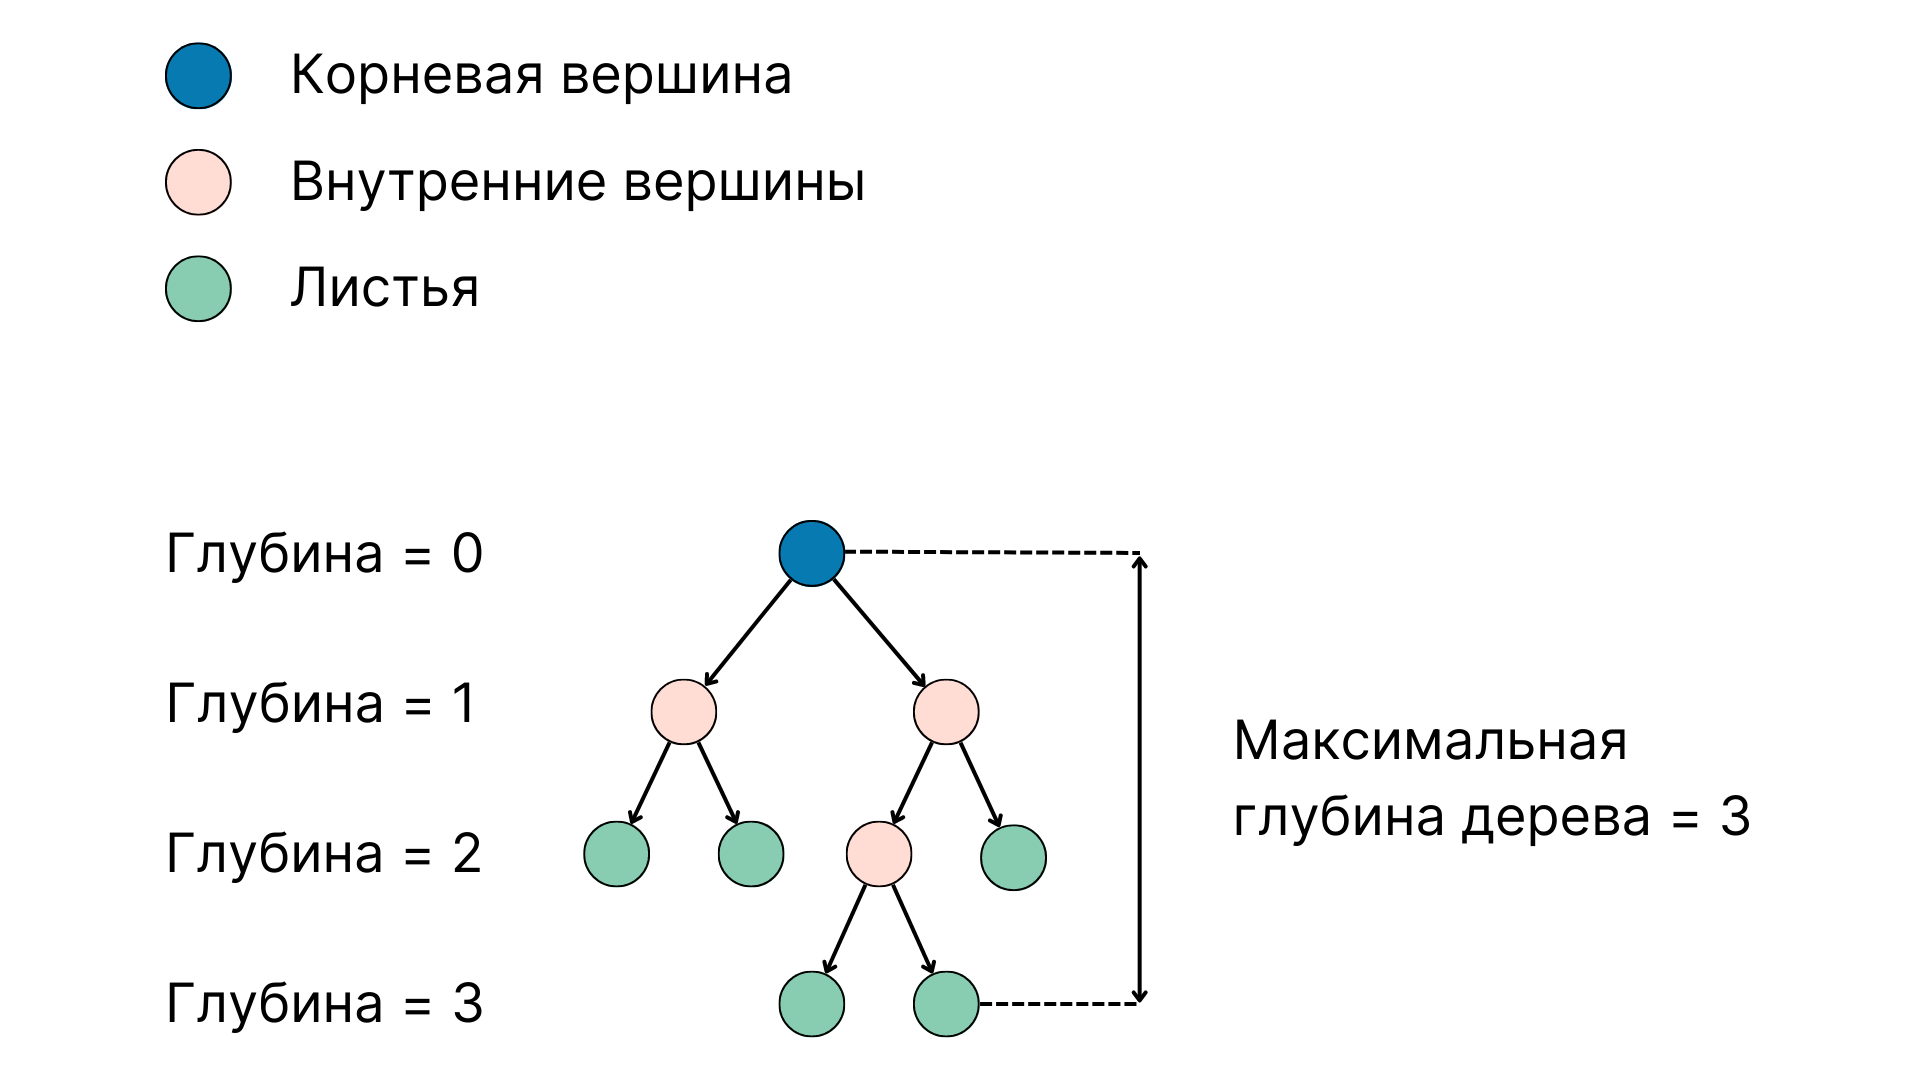

* Корневая вершина (root node) — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту. В примере со страхованием это был вопрос «Возраст автовладельца > 40».
* Внутренние вершины (intermediate nodes) — это дополнительные уточняющие вопросы, которые дерево задаёт объекту. 
* Листья (leafs) — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.
* Максимально возможная длина от корня до самых дальних листьев (не включая корневую) называется максимальной глубиной дерева (max depth).

В каждом блоке указаны следующие данные:

* Предикат I[xj<=t] — условие, по которому выборка делится на две части: на ту, для которой условие выполняется, и ту, для которой не выполняется.
* gini — критерий информативности Джини, о котором мы поговорим чуть позже.
* samples — количество объектов, которые мы проверяем на данном шаге.
* value — распределение по классам для объектов, которые мы проверяем на данном шаге: например value=[0, 50, 50] означает, что на текущем этапе разделения в выборке находится 0 объектов класса setosa и по 50 объектов классов versicolor и virginica.
* class — класс, который мы присваиваем, если завершим выполнение алгоритма на данном шаге.

In [1]:
def build_decision_tree(X, y):
    node = Node()
    if stopping_criterion(X, y) is True:
        node = create_leaf_with_prediction(y)        return node 
    else:
        X_left, y_left, X_rigth, y_rigth = best_split(X, y)
        node.left = build_decision_tree(X_left, y_left)
        node.right = build_decision_tree(X_rigth, y_rigth)

SyntaxError: invalid syntax (958542860.py, line 4)

	
1. Создать новую вершину node.

На первой итерации это будет корневая вершина. На последующих это будут внутренние вершины.

2. Проверить некоторый критерий остановки stop_criterion().

Например, критерием остановки может быть следующее условие: все объекты, которые попали в вершину, — это объекты одного и того же класса.

Или достигнута максимальная глубина дерева (max_depth), например 5. Это значит, что дерево не будет продолжать делиться, если глубина уже равна 5.

Другой критерий: число наблюдений в листе (в sklearn этот параметр обозначен как min_samples_leaf) меньше заданного, например 7. Это значит, что при выполнении такого условия дерево продолжит делиться в том случае, если решающее правило выполняется как минимум для 7 наблюдений.

* 2.1 Если условие остановки выполняется:

Проверить, какой класс преобладает в текущей вершине. Превратить текущую вершину дерева в лист, где всем наблюдениям, которые попали в эту вершину, присвоить метку преобладающего класса.

Прекратить построение дерева, вернув из алгоритма полученный лист.

* 2.2 Если условие остановки не выполняется:

Среди всех возможных предикатов  найти такой, который обеспечивает разбиение выборки наилучшим образом.

То есть нужно найти такой признак  и пороговое значение , при которых достигается максимум некоторой информативности (существуют разные меры информативности, о них поговорим ниже). Назовём эту часть алгоритма некоторой абстрактной функцией best_split().

Например, в нашем примере с ирисами это был предикат . Он обеспечил наилучшее разделение пространства на две части.

В результате разбиения будут созданы два набора данных:

X_left, y_left (левый), для которого выполняется условие ;
X_right, y_right (правый), для которого условие не выполняется.
Создаются две новые вершины: левая и правая, в каждую из которых отправляется соответствующий набор данных.

То есть происходит рекурсивный вызов функции build_decision_tree(), и для каждой новой вершины алгоритм повторяется вновь с новым набором данных.

* Примечание. Вершина дерева node задаёт целое поддерево идущих за ним вершин, если такие имеются, а не только саму вершину.

→ Важно понимать, что дерево решений — это топологический алгоритм, а не аналитический, то есть структуру дерева не получится описать в виде формулы, как те же линейные модели. Поэтому про стандартные методы оптимизации, такие как градиентный спуск или тем более метод наименьших квадратов, можно забыть. 

'from sklearn import tree #модели деревьев решения'

Модель дерева решений для решения задачи классификации реализована в классе DecisionTreeClassifier. Данный класс реализует обучение по алгоритму CART.

Основные параметры DecisionTreeClassifier

* criterion — критерий информативности ('gini' — критерий Джини и 'entropy' — энтропия Шеннона).
* max_depth — максимальная глубина дерева (по умолчанию — None, глубина дерева не ограничена).
* max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве (по умолчанию — None, то есть обучение производится на всех признаках). 
Нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
* min_samples_leaf — минимальное число объектов в листе (по умолчанию — 1). У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те решающие правила, которые верны как минимум для пяти объектов.
* random_state — число, отвечающее за генерацию случайных чисел.



6.10 

Для выполнения задания используйте датасет о диабете из данного модуля. Для обучения используйте все доступные признаки.

Обучите дерево решений с максимальной глубиной 6 и критерием информативности Джини. В качестве значения параметра random_state возьмите число 42.

Сделайте предсказание и рассчитайте -меру.

Чему равно значение метрики? Ответ запишите с точностью до второго знака после точки-разделителя.

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import tree #модели деревьев решения


In [2]:
df = pd.read_csv('data/diabetes_cleaned.csv')

In [4]:
#Создаём матрицу признаков X и столбец с ответами y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [6]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='gini', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred)) #0.78

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       493
           1       0.85      0.73      0.78       264

    accuracy                           0.86       757
   macro avg       0.85      0.83      0.84       757
weighted avg       0.86      0.86      0.86       757



[Динамическое программирование](https://ru.wikipedia.org/wiki/Динамическое_программирование) изучить!

Примечание. Количество перебираемых вариантов можно сократить, используя методы динамического программирования (их изучение не входит в рамки нашего курса).